# SOFTWARE PARA SISTEMATIZAR LA VALIDACIÓN DE MODELOS DE RECONSTRUCCIÓN DE SERIES DE TIEMPO CON APLICACIÓN AL ESTUDIO DE LAS CONCENTRACIONES DE CONTAMINANTES PM2.5

## OBJETIVO:

Crear un software compuesto por un conjunto de funciones que ayuden a agilizar el estudio sistemático y objetivo del desempeño de algoritmos de reconstrucción de series de tiempo, para el análisis y predicción numérica de diferentes fenómenos naturales susceptibles a ser estudiados desde la teoría de series de tiempo y sistemas dinámicos.

# Librerias 
Se importan las librerías que se usan a lo largo del README

In [2]:
#Se importa la libreria pandas para observar el archivo de tiempo
#Libreria para manipular variables de tiempo
#Importación de la libreria desarrollada
#Libreria que permite crear series de datos con caos
import pandas as pd    
import matplotlib.pyplot as plt       
import datetime
import cepy as cp
from lorenz import *

## EJEMPLO 1:
### POCOS DATOS. 

La libreria tiene como entradas dos listas, la primera es una lista de tamñano n de números reales y la segunda es una lista de tamaño n de fechas 

In [ ]:
#Lista de datos con valores nulos
data = [1,2,3,np.nan,np.nan,4,np.nan,5,6,7,8,9]
#Liista de fechas
date = ['01/01/1986 01:00:00', '01/01/1986 02:00:00', '01/01/1986 03:00:00', '01/01/1986 04:00:00', '01/01/1986 05:00:00', '01/01/1986 06:00:00', '01/01/1986 07:00:00', '01/01/1986 08:00:00', '01/01/1986 09:00:00', '01/01/1986 10:00:00', '01/01/1986 11:00:00', '01/01/1986 12:00:00']

Usanda la libreria  **cepy** ingresamos los datos y las fechas en el objeto Reconstruir y con ello creamos una estrucutra que busca facilitar la implentación de métodos de reconstrucción y visualización de datos.

In [ ]:
#Vector de clasificación v = [0.6,0.2,0.2], la suma debe ser uno.
clasificacion = [0.6,0.2,0.2]
#Creación del objeto se alimenta con el vector de datos, el vector de fechas y el vector de clasificación (opcional)
prueba = cp.AnalisisDatos(data,date,"Prueba",clasificacion)

Podemos observar de forma estadistica los datos numéricos usando el método **describe**, el cual mostrará la relación de datos y el histograma relacionado. Se puede agregar contenido en función de las necesidades.

In [ ]:
pie, datos, huecos = prueba.describe(savefig=False)

Las variables **pie, datos, huecos** recoecta la información que permite crear las gráficas.

Se puede obtener también un gráfico por separado de los histogramas

In [ ]:
n1, bin1 = prueba.histograma('d')
n2, bin2 = prueba.histograma('h')

Podemos generar una lista de huecos artificiales al ingresar dos vectores de frecuencia.

In [ ]:
#Secuencia aleatoria de números
frecuenciaH = [1,3,5]
frecuenciaD = [4,2,3]
#Nueva columna
nuevaCol = prueba.genera_huecos(frecuenciaH,frecuenciaD)
print(nuevaCol)

Los huecos que se generaron no son alamcenados por el objeto de forma directa; para almacenar la información se usa el método *añadir*

In [ ]:
#Método 1
nombreCol1 = "HuecosM1"
prueba.añadir(nombreCol1,prueba.genera_huecos(frecuenciaH,frecuenciaD))
prueba.obtener(nombreCol1)
print("Método 1: ",prueba.obtener(nombreCol1))
#Método 2
nombreCol2 = "HuecosM2"
nuevaCol = prueba.genera_huecos(frecuenciaH,frecuenciaD)
prueba.añadir(nombreCol2,nuevaCol)
print("Método 2: ",prueba.obtener(nombreCol2))

Los métodos del objeto buscan facilitar la implementación de algoritmos. Ejemplificamos con un método que toma como báse la idea de vecinos cercanos.

In [ ]:
h = 1
m = 1
tau = 1
k = 1
nuevaCol = cp.kvecinos(prueba,h,m,tau,k)
print("R:",nuevaCol)

Todos los datos que hayamos generado en el objeto podemos almacenarlos en él y al final obtener un archivo con toda la información generada

In [ ]:
prueba.añadir("Datos2",data)

Podemos recuperar la información llamandola por el nombre de entrada

In [ ]:
aux = prueba.obtener("Datos2")
print(aux)

Podemos almacenar nuestos datos 

In [ ]:
#Guardamos los datos en un csv
prueba.guardar("Prueba.csv")

Exploramos el resultado, el archivo creado toma la nomenclatura **f_nombre** con nombre dado en las primeras 

In [ ]:
#Exploramos el archivo creado
f = pd.read_csv("./Prueba.csv")
f.head()

# Lorenz

In [1]:
#Se importa la libreria pandas para observar el archivo de tiempo
#Libreria para manipular variables de tiempo
#Importación de la libreria desarrollada
#Libreria que permite crear series de datos con caos
import pandas as pd    
import matplotlib.pyplot as plt       
import datetime
import cepy as cp
import numpy as np
from lorenz import *

In [2]:
#Ingresar datos al objeto
lorenz = generateLorenz(npoints=900).tolist()  
#lorenz = [np.sin(x) for x in range(0,900)]
f1 = pd.read_csv('fCDMX.csv')
#Creamos una lista de datos con mil ochocientos datos

dateLorenz = f1['date'][:900].to_list()

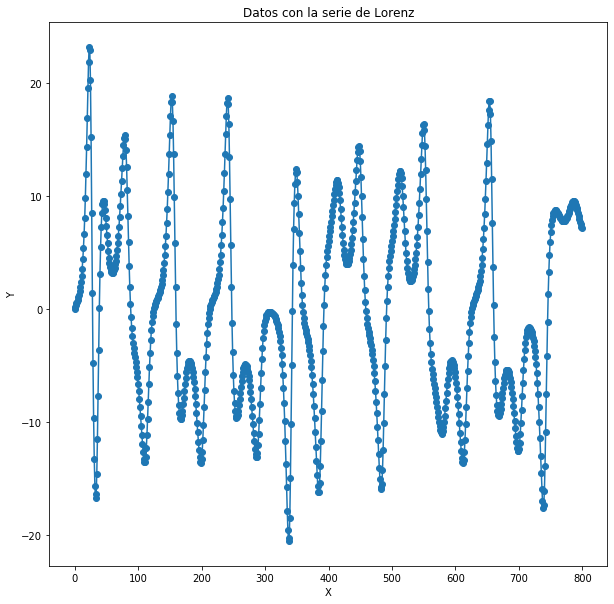

In [3]:

plt.figure(figsize=(10,10))
plt.plot(lorenz[:800],'-o')
plt.title("Datos con la serie de Lorenz")
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("F1.png")
plt.show()

In [5]:
pLorenz = cp.AnalisisDatos(lorenz,dateLorenz,"Lorenz")

--------------------------------------
----------ANÁLISIS DE DATOS-----------

Nombre de la serie:  Lorenz
Tamaño de la serie:  900
---- 01/01/1986 01:00:00-- 04/02/1986 12:00:00 ----
Cantidad de datos nulos: 0
Cantidad de datos no nulos: 900



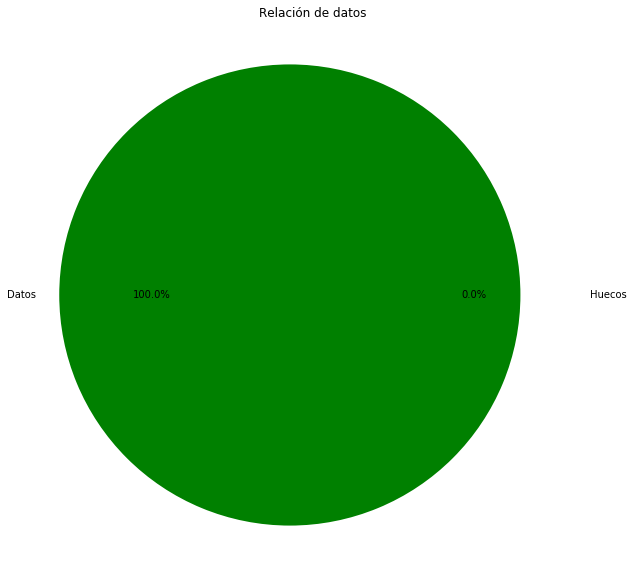

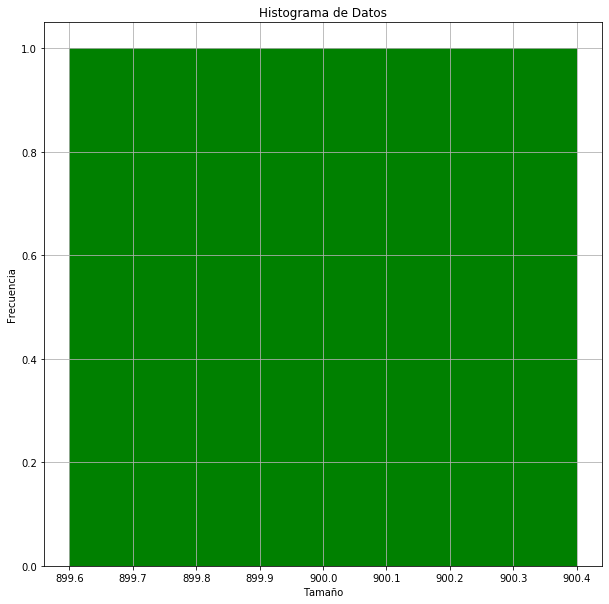

([900, 0], ([900], [1]), False)

In [6]:
pLorenz.describe()

In [18]:
#Repetir hasta que funcione
#Solucionando.
np.random.seed(0)
denH = np.random.randint(10, size=(100))
denD = np.random.randint(10, size=(10))
huecos = pLorenz.genera_huecos(denH,denD)

Generando huecos...
Huecos generados


--------------------------------------
----------ANÁLISIS DE DATOS-----------

Nombre de la serie:  Lorenz
Tamaño de la serie:  900
---- 01/01/1986 01:00:00-- 04/02/1986 12:00:00 ----
Cantidad de datos nulos: 0
Cantidad de datos no nulos: 900



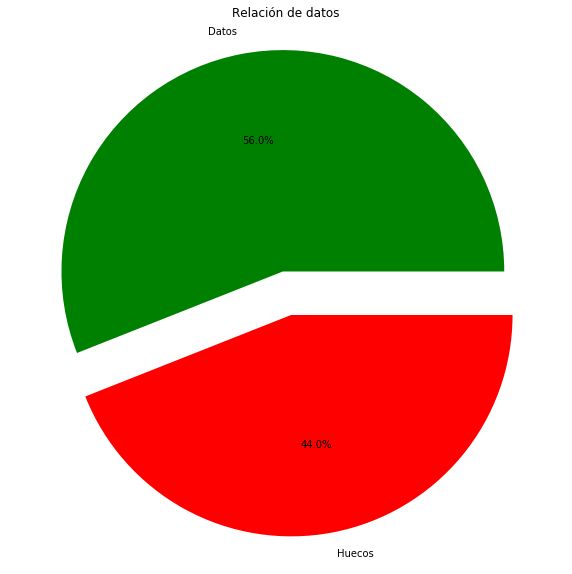

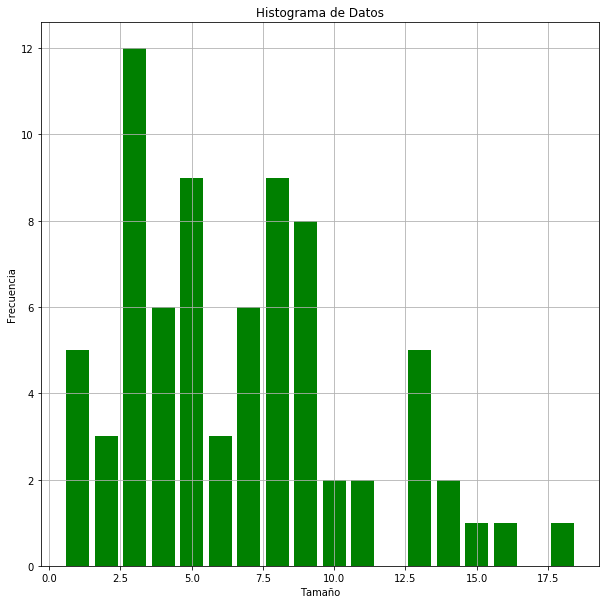

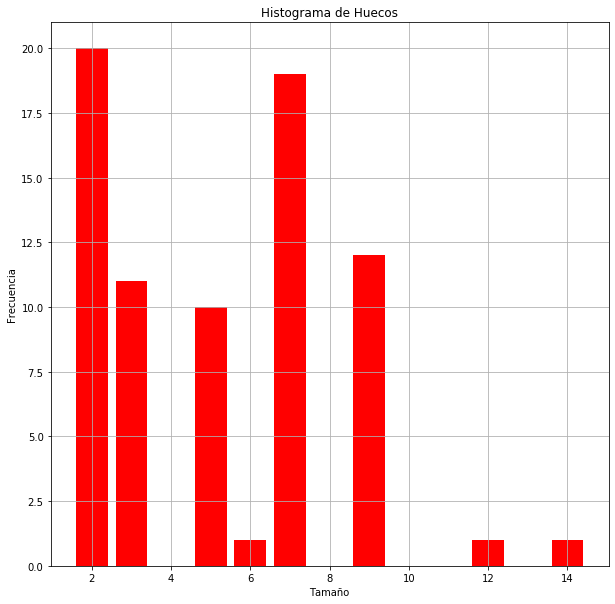

([900, 0],
 ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18],
  [5, 3, 12, 6, 9, 3, 6, 9, 8, 2, 2, 5, 2, 1, 1, 1]),
 ([2, 3, 5, 6, 7, 9, 12, 14], [20, 11, 10, 1, 19, 12, 1, 1]))

In [19]:
pLorenz.describe(huecos)

In [26]:
h = 1
m = 3
tau = 3
k = 1
r = cp.kvecinos(pLorenz,h,m,tau,k)
print("R:",r)

Generando huecos...
Huecos generados
huecos: [4, 16, 28, 40, 52, 64, 76, 88, 100, 112, 124, 136, 148, 160, 172, 184, 196, 208, 220, 232, 244, 256, 268, 280, 292, 304, 316, 328, 340, 352, 364, 376, 388, 400, 412, 424, 436, 448, 460, 472, 484, 496, 508, 520, 532]
[[1, 0, 0, 1], 1]
[0.4984848056, 0.6467254257473469, 0.8143907359388365, 1.0127748841449131]
[6.603907091398972, 8.079802926882635, 9.844533131178542, 11.918486779583473]
[8.442668926846979, 1.421325726401748, -4.744368425836309, -9.6296386491715]
[0.047592183548814226, 3.1173996808454936, 5.509918621407161, 7.274126544910713]
[6.539456027853957, 5.792127305611548, 5.116144418628738, 4.535717550415636]
[3.643475244611873, 3.9260527326530545, 4.278554495253535, 4.70508021768493]
[12.463767111370037, 13.54751073348675, 14.475110514644843, 15.11978452236454]
[1.972087152456768, 0.4629912981235882, -0.7382394544163917, -1.6774893815653367]
[-6.062034155227153, -6.62161855645992, -7.244942745696093, -7.934039246200392]
[-13.518403413

In [27]:
keys = r.keys()
datosGenerados = [r[k][0][0] for k in keys]
datosReales = [r[k][1][0] for k in keys]

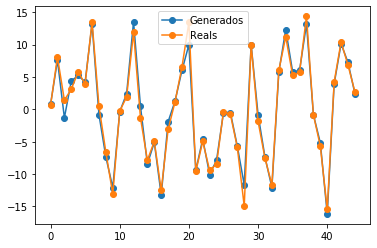

In [28]:
plt.plot(datosGenerados,'-o',label="Generados")
plt.plot(datosReales,'-o',label="Reals")
plt.legend()

# Datos Reales

In [50]:
df = pd.read_csv('fCDMX.csv')
date = df.date.to_list()[5000:10000]
data = df.MER.to_list()[5000:10000]

In [51]:
objMer = cp.AnalisisDatos(data,date,'MERCED')

--------------------------------------
----------ANÁLISIS DE DATOS-----------

Nombre de la serie:  MERCED
Tamaño de la serie:  50000
---- 01/01/1986 01:00:00-- 22/06/1991 08:00:00 ----
Cantidad de datos nulos: 19495
Cantidad de datos no nulos: 30505



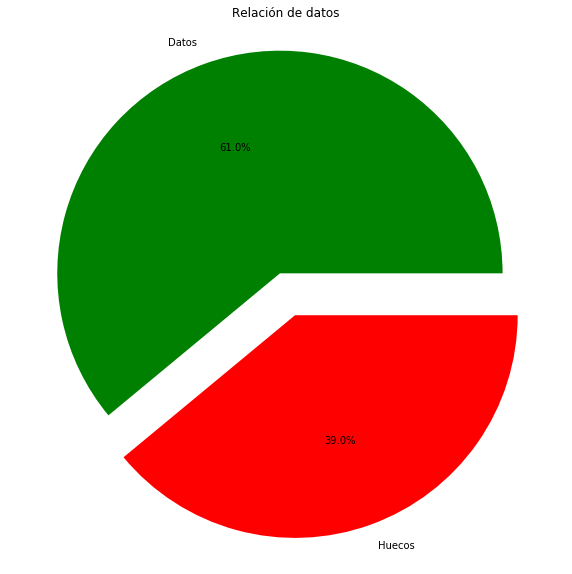

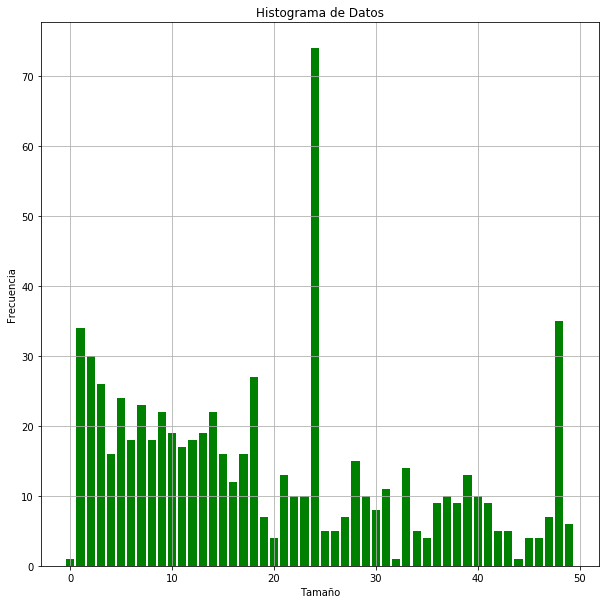

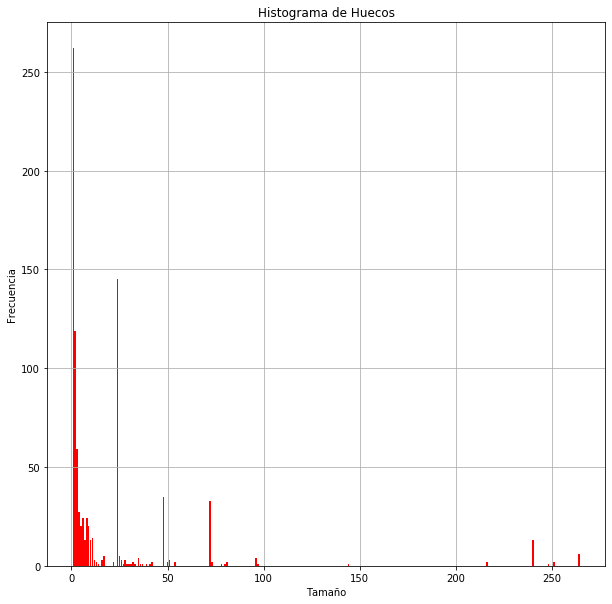

In [46]:
size, hdata, hhuecos = objMer.describe()

In [67]:
h = 1
m = 1
tau = 1
k = 1
r = cp.kvecinos(objMer,h,m,tau,k,genera_huecos=False)
#print("R:",r)

huecos: [1590]
[[1, 0, 1], 1]


In [68]:
keys = r.keys()
datosGenerados = [r[k][0][0] for k in keys]
datosReales = [r[k][1][0] for k in keys]

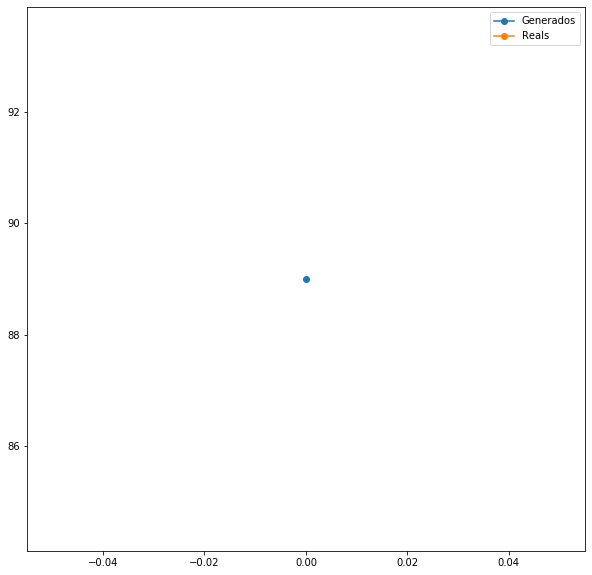

In [69]:
plt.figure(figsize=(10,10))
plt.plot(datosGenerados[:50],'-o',label="Generados")
plt.plot(datosReales[:50],'-o',label="Reals")
plt.legend()

126.0 0.0


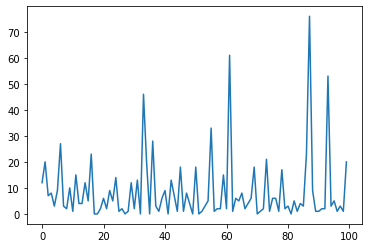

In [37]:
aux = [abs(datosReales[i]-datosGenerados[i])for i in range(len(datosReales))]
plt.plot(aux[:100])
print(max(aux),min(aux))

In [62]:
objMer.añadir("reconst",datosGenerados)

In [65]:
objMer.dicc

{'reconst': [88.0,
  112.0,
  20.0,
  89.0,
  77.0,
  22.0,
  105.0,
  122.0,
  20.0,
  122.0,
  38.0,
  63.0,
  40.0,
  65.0,
  35.0,
  19.0,
  89.0,
  63.0,
  18.0,
  68.0,
  77.0,
  20.0,
  116.0,
  24.0,
  27.0,
  83.0]}